## Classify fetal health in order to prevent child and maternal mortality

Installing Pycaret

In [1]:
!pip install pycaret

Defaulting to user installation because normal site-packages is not writeable


Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.13.0


# Context
Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

# Dataset:

The “Fetal Health Classification” used for Principal Component Analysis (PCA) and classification models is obtained from Kaggle. The data set provides information about fetal health.

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes: Normal, Suspect and Pathological.

All attributes are numerical and they are listed bellow:

In [4]:
df = pd.read_csv('fetal_health.csv', engine="python")
df.head(500)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,127.0,0.011,0.033,0.002,0.000,0.0,0.0,38.0,1.4,0.0,...,61.0,174.0,6.0,1.0,129.0,144.0,141.0,45.0,1.0,1.0
496,130.0,0.014,0.092,0.001,0.000,0.0,0.0,32.0,2.4,0.0,...,50.0,170.0,10.0,0.0,159.0,150.0,155.0,27.0,1.0,1.0
497,130.0,0.016,0.084,0.002,0.000,0.0,0.0,34.0,2.1,0.0,...,50.0,182.0,8.0,0.0,159.0,151.0,155.0,25.0,1.0,1.0
498,130.0,0.015,0.115,0.000,0.000,0.0,0.0,31.0,2.6,0.0,...,50.0,170.0,12.0,0.0,157.0,151.0,156.0,24.0,1.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Cleaning Duplicate Rows

In [6]:
df = df.drop_duplicates()

print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [7]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


Exploratory Data Analysis

In [ ]:
sns.pairplot(df, hue='fetal_health')
plt.show()

In [ ]:
y =df['fetus_health']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

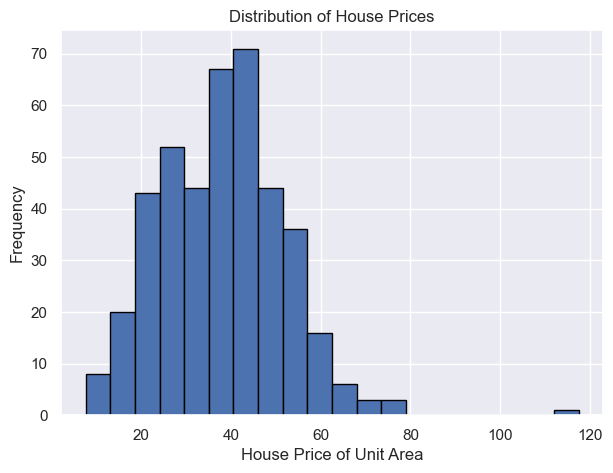

In [60]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.hist(df['Y house price of unit area'], bins=20, edgecolor='black')
plt.xlabel('House Price of Unit Area')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')a
plt.show()

In [21]:
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of duplicated rows is:  0
Number of rows with NaNs is:  0


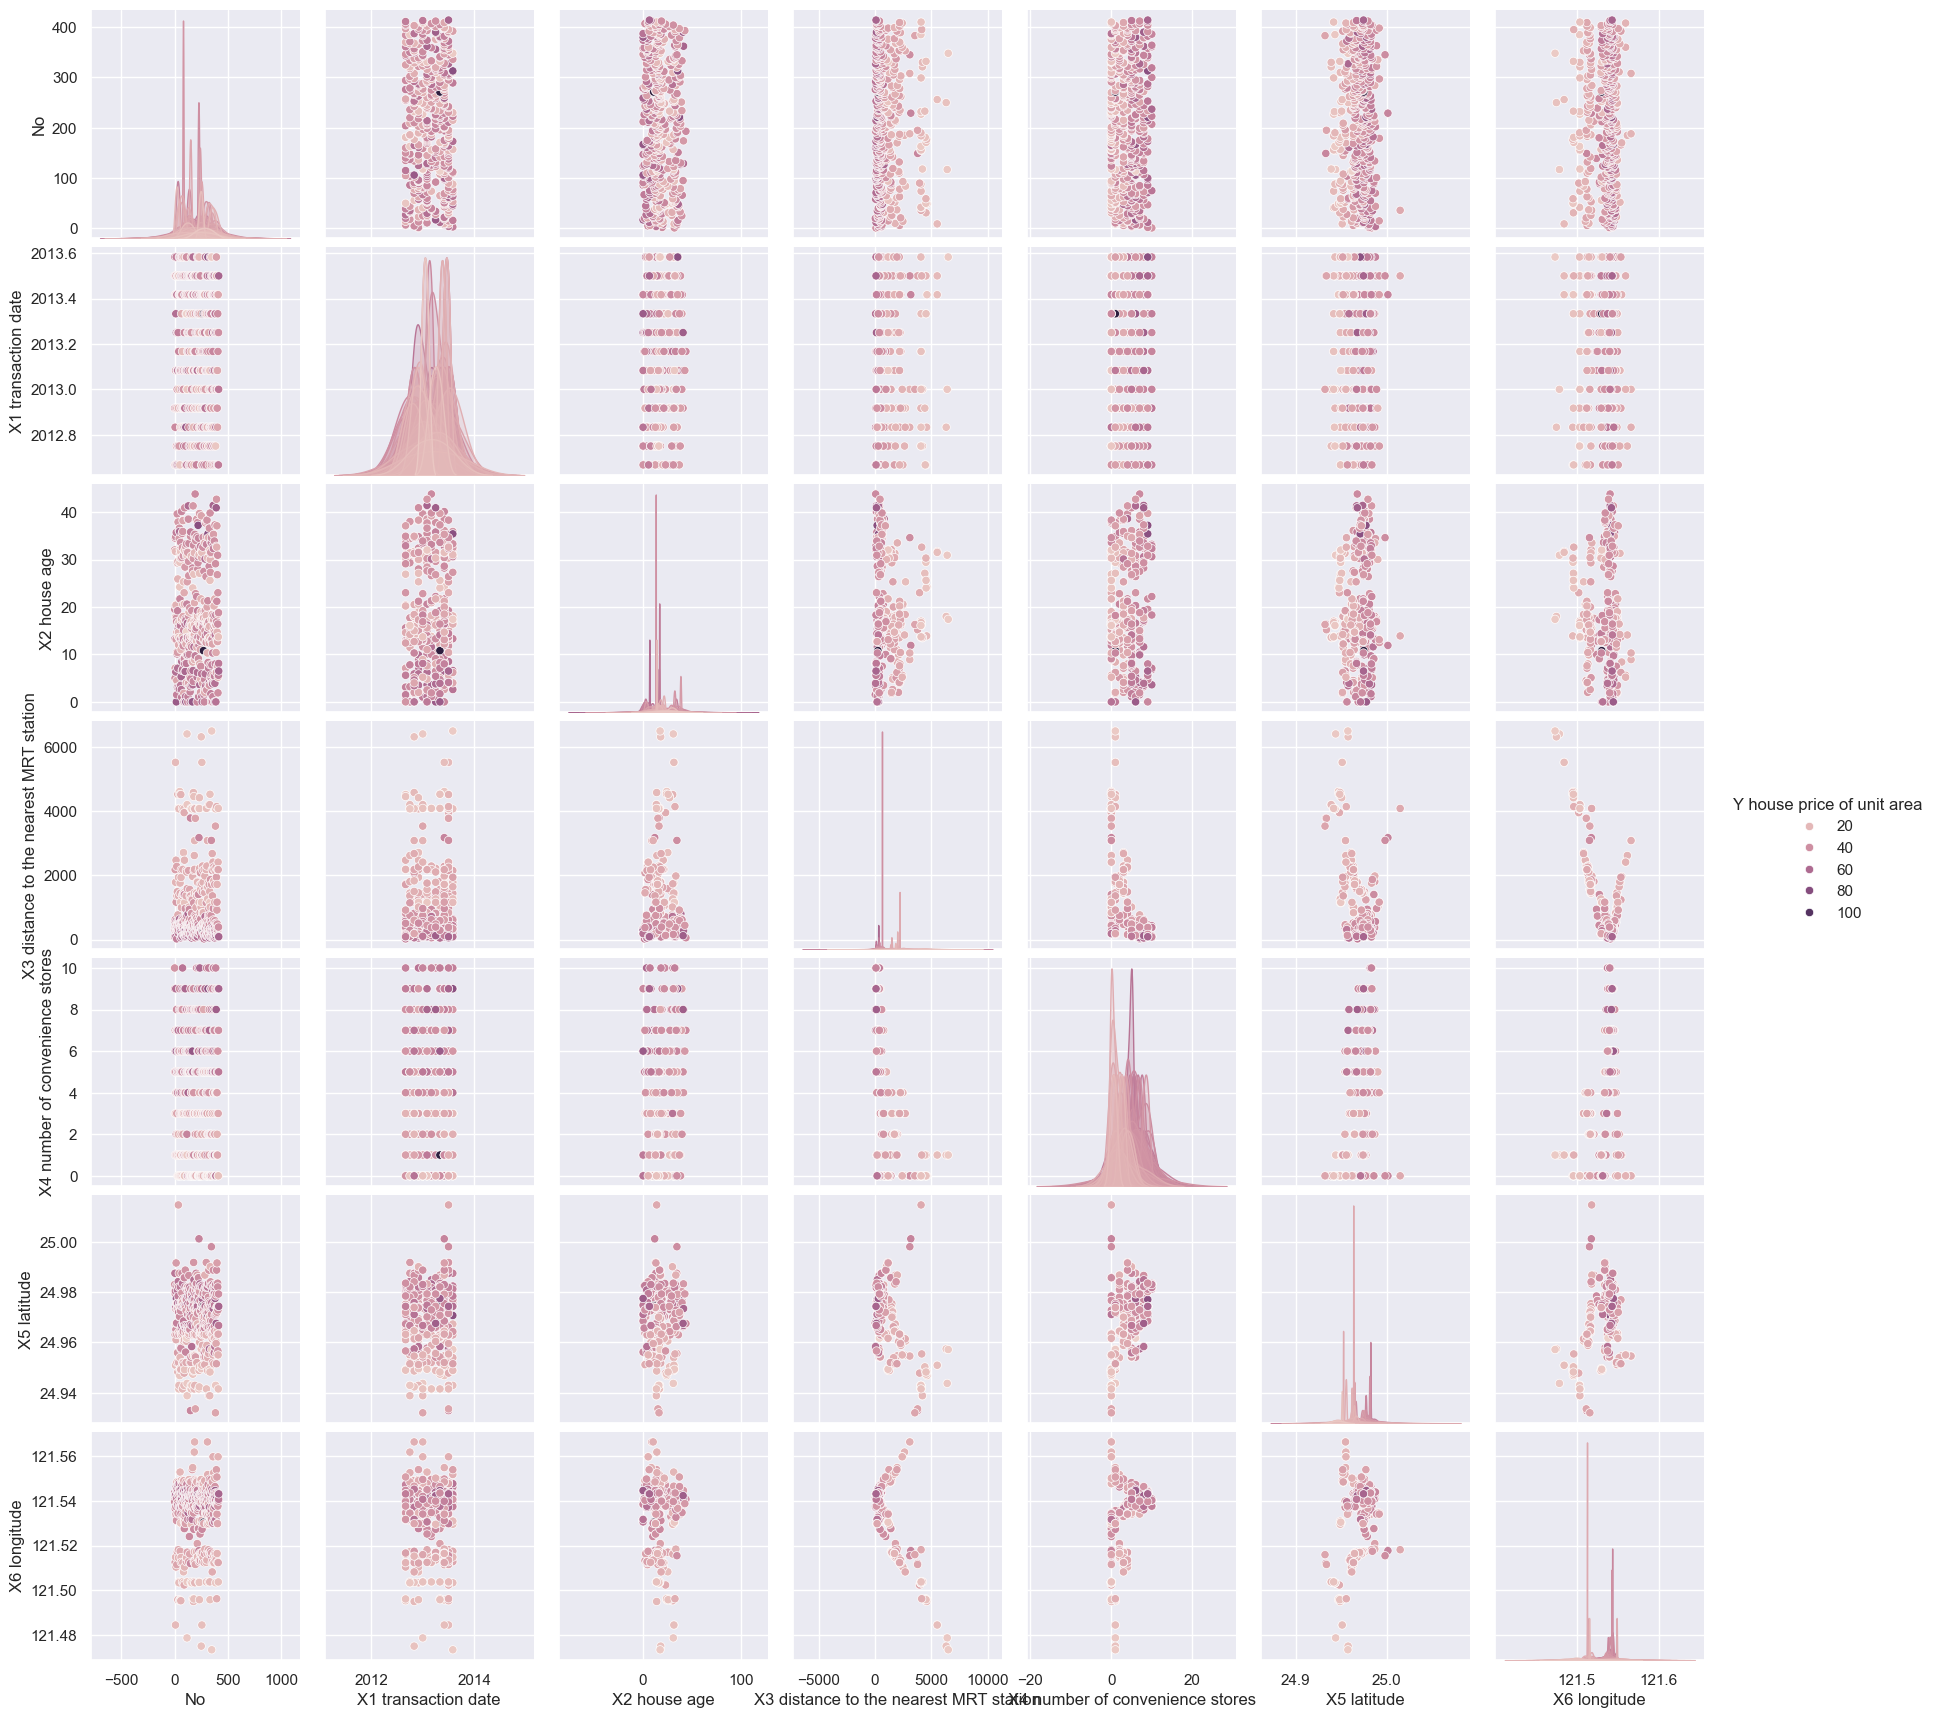

In [61]:
sns.pairplot(df, hue='Y house price of unit area')
plt.show()

In [66]:
X = df.drop(columns=['No', 'Y house price of unit area', 'Price Category'])
X.head(500)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [67]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X1 transaction date,414.0,2013.148971,0.281967,2012.66700,2012.917000,2013.16700,2013.417000,2013.58300
X2 house age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
X3 distance to the nearest MRT station,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
X4 number of convenience stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
X5 latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
X6 longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627


In [68]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762
1,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139
2,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183
3,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183
4,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937
5,-1.711384,-0.932668,0.865586,-0.371925,-0.482451,-1.358313
6,-1.711384,1.475337,-0.365237,0.987694,0.830961,0.199555
7,0.951718,0.227393,-0.631678,0.647789,0.918898,0.581846
8,1.246435,1.229263,3.512777,-1.051734,-1.458635,-3.182350
9,0.951718,0.016473,0.554738,-0.371925,-0.138769,-1.206962


In [69]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X1 transaction date,414.0,3.705506e-13,1.00121,-1.711384,-0.823683,0.064017,0.951718,1.541151
X2 house age,414.0,-9.225042e-17,1.00121,-1.556639,-0.763492,-0.141717,0.917277,2.292652
X3 distance to the nearest MRT station,414.0,-1.265762e-16,1.00121,-0.841279,-0.630312,-0.469349,0.293827,4.287008
X4 number of convenience stores,414.0,-7.508755e-18,1.00121,-1.391638,-1.051734,-0.032020,0.647789,2.007407
X5 latitude,414.0,1.343166e-13,1.00121,-2.981805,-0.486485,0.166994,0.679693,3.675611
X6 longitude,414.0,-1.614537e-12,1.00121,-3.903223,-0.344198,0.343730,0.648715,2.146891


In [70]:
observations = list(df.index)
variables = list(df.columns)

[Text(0, 0, 'X1 transaction date'),
 Text(1, 0, 'X2 house age'),
 Text(2, 0, 'X3 distance to the nearest MRT station'),
 Text(3, 0, 'X4 number of convenience stores'),
 Text(4, 0, 'X5 latitude'),
 Text(5, 0, 'X6 longitude')]

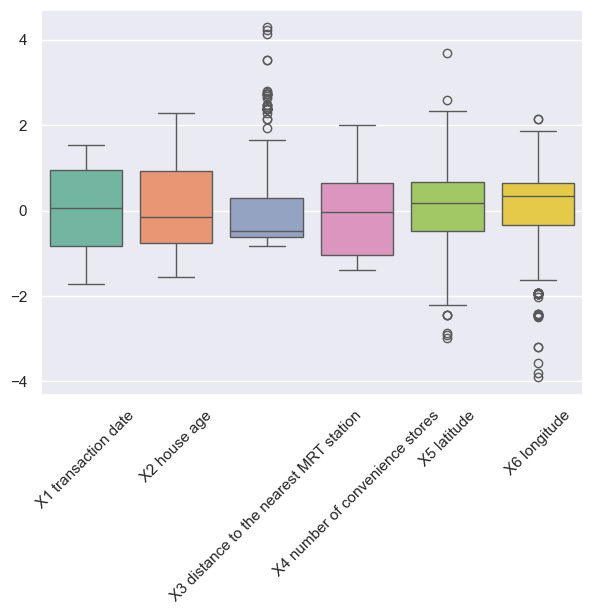

In [71]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

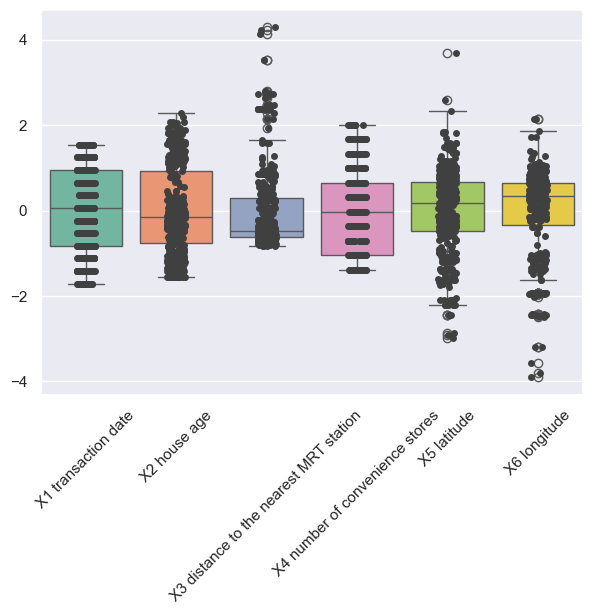

In [72]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

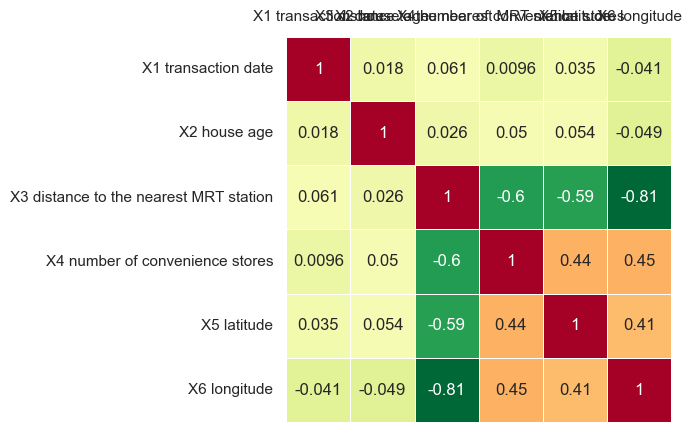

In [73]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

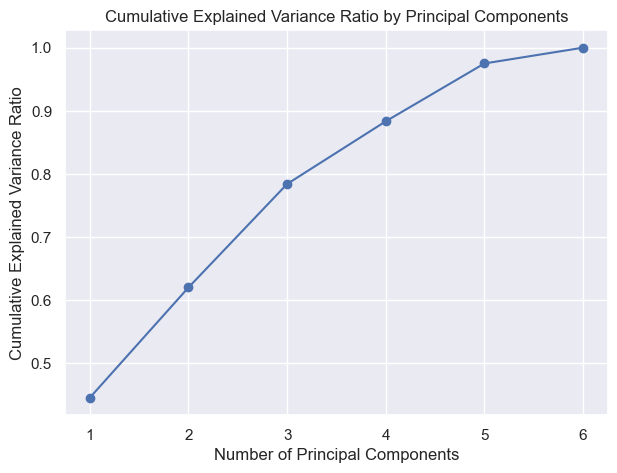

In [80]:
from sklearn.decomposition import PCA

# Extract features (X1 to X6)
features = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
               'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

pca = PCA()
principal_components = pca.fit_transform(features_standardized)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative variance explained
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot the explained variance ratio
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.show()

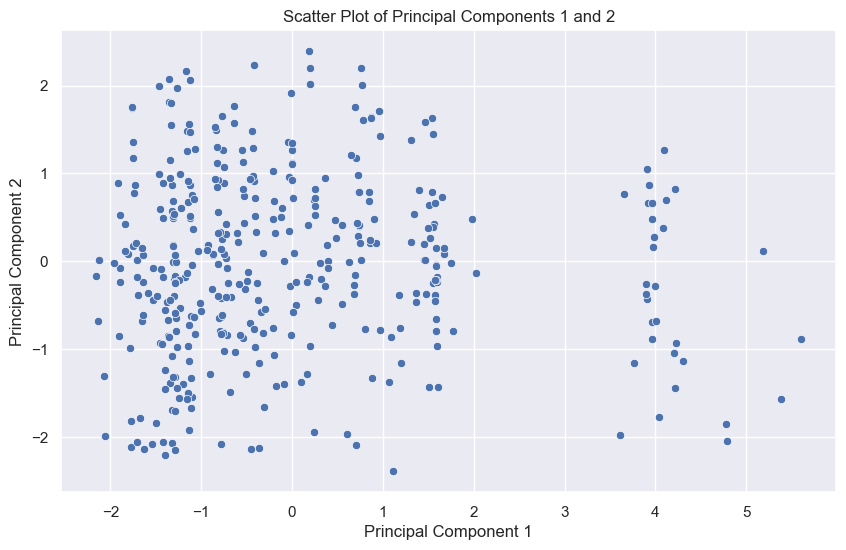

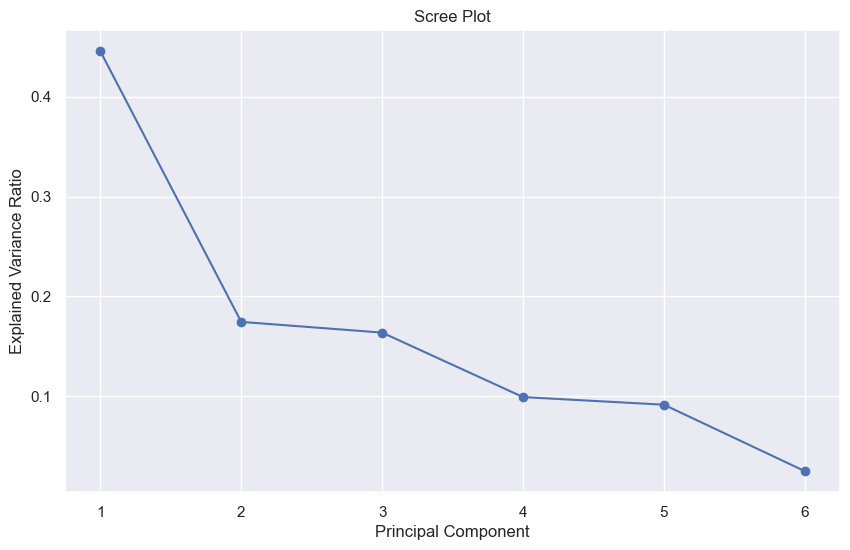

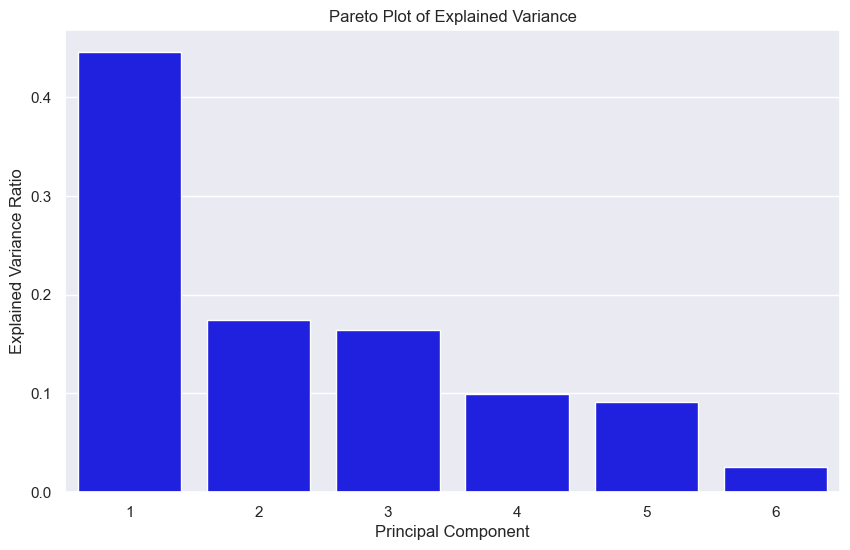

In [81]:
# Scatter Plot of the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components 1 and 2')
plt.show()

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Pareto Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=range(1, len(explained_variance_ratio) + 1), y=explained_variance_ratio, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Pareto Plot of Explained Variance')
plt.show()

ValueError: Invalid RGBA argument: 'r1'

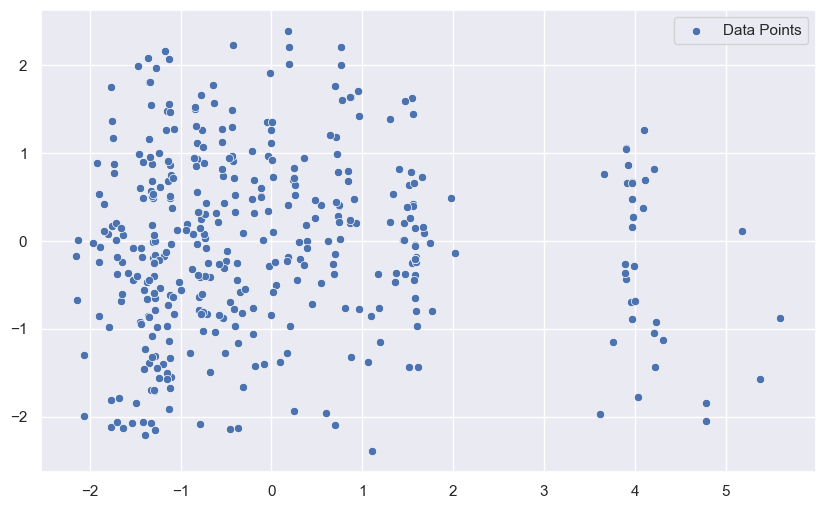

In [82]:
# Get eigenvectors
eigenvectors = pca.components_

# Scatter Plot of the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], label='Data Points')

# Scatter Plot of Eigenvectors
for i in range(len(eigenvectors)):
    plt.arrow(0, 0, eigenvectors[0, i], eigenvectors[1, i], color=f'r{i+1}', alpha=0.8, label=f'Eigenvector {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components and Eigenvectors')
plt.legend()
plt.show()

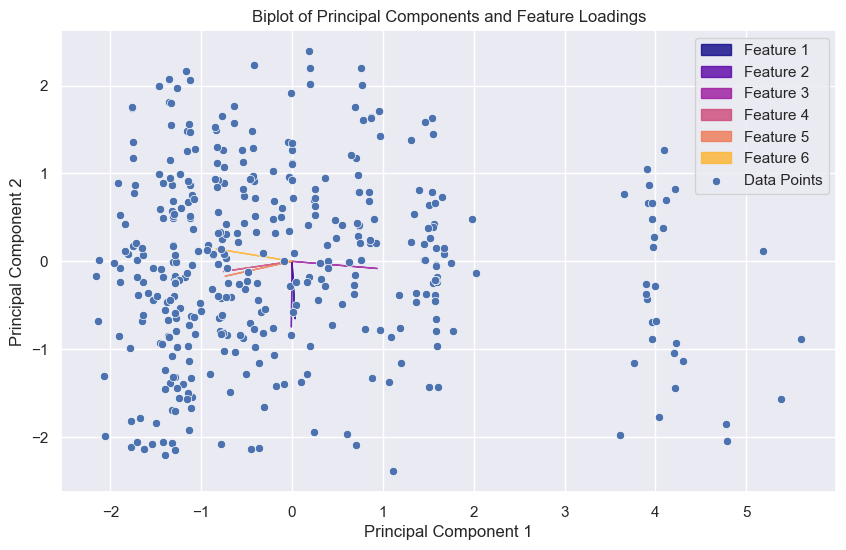

In [89]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract features (X1 to X6)
features = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
               'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(features_standardized)

# Get loadings (eigenvectors scaled by the square root of the eigenvalues)
loadings = pca.components_ * np.sqrt(pca.explained_variance_).reshape(-1, 1)

# Biplot
plt.figure(figsize=(10, 6))
for i in range(len(principal_components[0])):
    plt.arrow(0, 0, loadings[0, i], loadings[1, i], color=plt.cm.plasma(i / len(principal_components[0])), alpha=0.8, label=f'Feature {i+1}')

sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], label='Data Points')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot of Principal Components and Feature Loadings')
plt.legend()
plt.show()

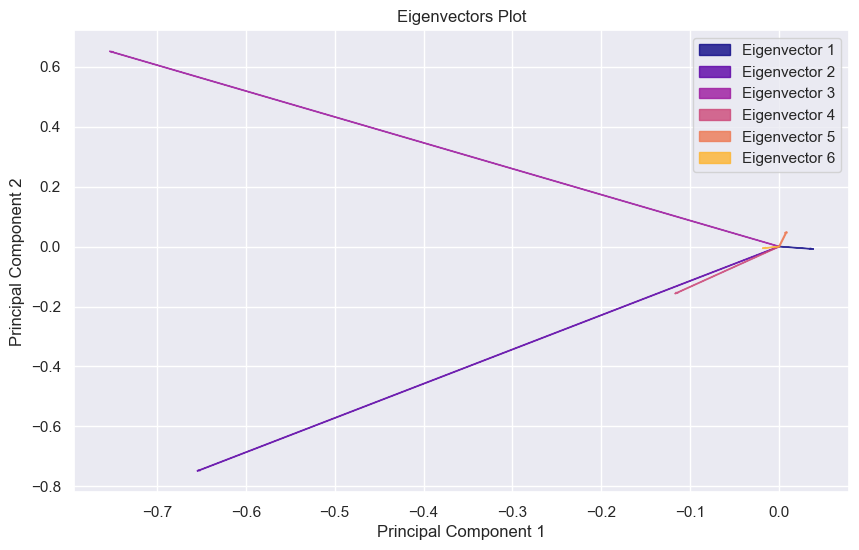

In [92]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract features (X1 to X6)
features = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
               'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(features_standardized)

# Get loadings (eigenvectors scaled by the square root of the eigenvalues)
eigenvectors = pca.components_ * np.sqrt(pca.explained_variance_).reshape(-1, 1)

# Plot Eigenvectors
plt.figure(figsize=(10, 6))
for i in range(len(eigenvectors)):
    plt.arrow(0, 0, eigenvectors[i, 0], eigenvectors[i, 1], color=plt.cm.plasma(i / len(eigenvectors)), alpha=0.8, label=f'Eigenvector {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Eigenvectors Plot')
plt.legend()
plt.show()

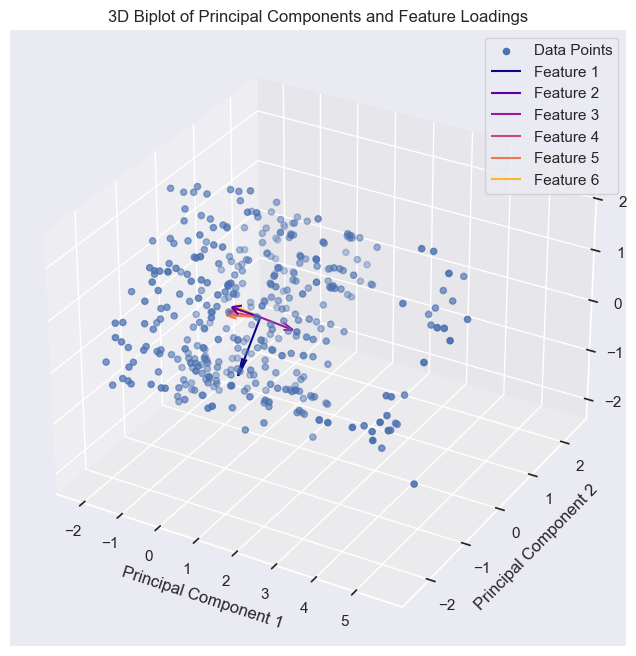

In [93]:
from mpl_toolkits.mplot3d import Axes3D

# Extract features (X1 to X6)
features = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
               'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(features_standardized)

# Get loadings (eigenvectors scaled by the square root of the eigenvalues)
loadings = pca.components_ * np.sqrt(pca.explained_variance_).reshape(-1, 1)

# Create a 3D biplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], label='Data Points')

# Plot arrows for loadings
for i in range(len(loadings[0])):
    ax.quiver(0, 0, 0, loadings[0, i], loadings[1, i], loadings[2, i], color=plt.cm.plasma(i / len(loadings[0])), label=f'Feature {i+1}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Biplot of Principal Components and Feature Loadings')
ax.legend()
plt.show()

In [94]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (373, 9)
Unseen Data For Predictions: (41, 9)


In [96]:
from pycaret.classification import *
clf = setup(data=data, target='Y house price of unit area', train_size=0.7, session_id=123)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

Mean Squared Error: 53.50561912450263
R-squared: 0.6810580555095913


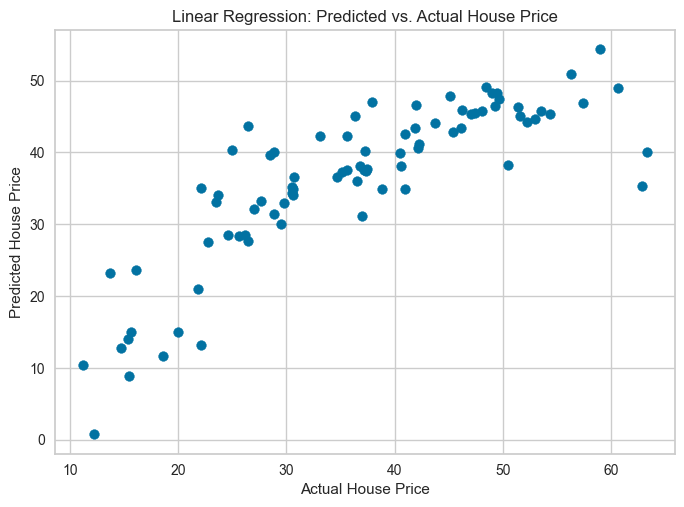

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Extract features (X1 to X6) and target variable (Y house price of unit area)
X = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
        'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot predictions vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Linear Regression: Predicted vs. Actual House Price')
plt.show()

Mean Squared Error: 53.50561912450263
R-squared: 0.6810580555095913


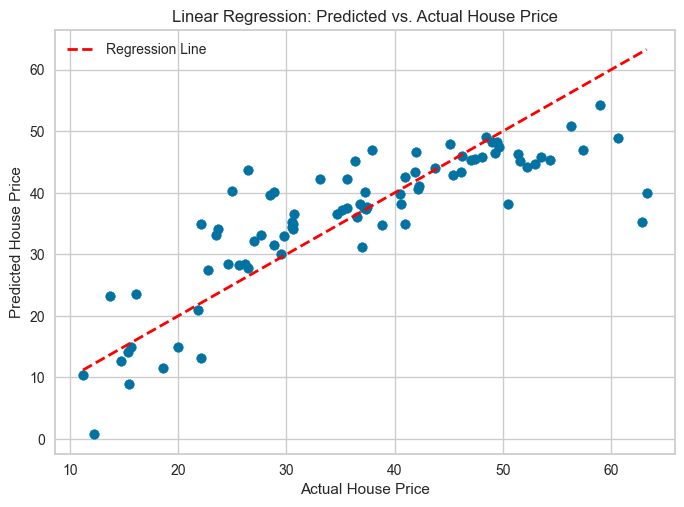

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Extract features (X1 to X6) and target variable (Y house price of unit area)
X = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
        'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot predictions vs. actual values with the regression line
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Regression Line')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Linear Regression: Predicted vs. Actual House Price')
plt.legend()
plt.show()

Mean Squared Error: 54.48052048192771
R-squared: 0.6752467605519538


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

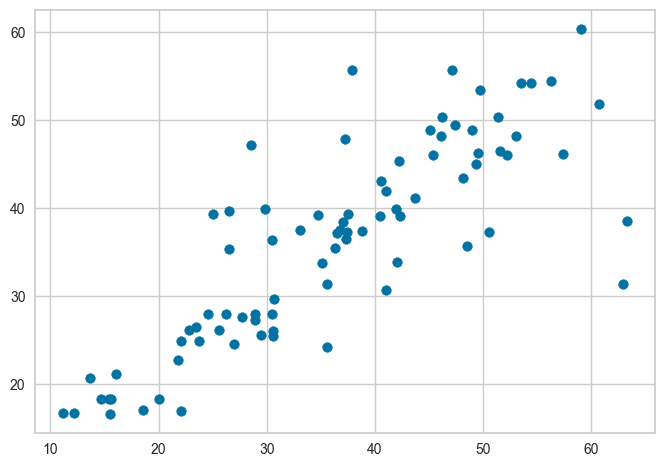

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Extract features (X1 to X6) and target variable (Y house price of unit area)
X = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
        'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the kNN regression model
k_value = 5  # You can adjust the number of neighbors (k) based on your needs
model = KNeighborsRegressor(n_neighbors=k_value)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Get indices of the k-nearest neighbors for the first few test samples
neighbors_indices = model.kneighbors(X_test, n_neighbors=k_value, return_distance=False)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot predictions vs. actual values with neighbors highlighted
plt.scatter(y_test, y_pred, label='Predictions')
for indices in neighbors_indices:
    plt.scatter([y_test.iloc[i]] * k_value, y_pred.iloc[indices], marker='x', label='Neighbors', alpha=0.5)

plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title(f'kNN Regression (k={k_value}): Predicted vs. Actual House Price')
plt.legend()
plt.show()

Mean Squared Error: 54.48052048192771
R-squared: 0.6752467605519538


IndexError: positional indexers are out-of-bounds

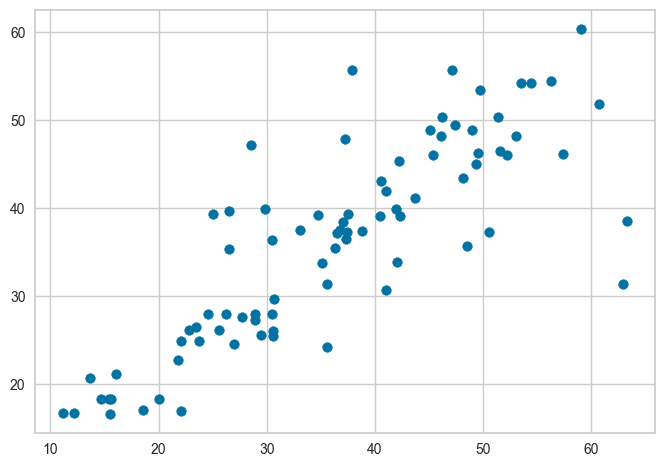

In [101]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset


# Extract features (X1 to X6) and target variable (Y house price of unit area)
X = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
        'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the kNN regression model
k_value = 5  # You can adjust the number of neighbors (k) based on your needs
model = KNeighborsRegressor(n_neighbors=k_value)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Get indices of the k-nearest neighbors for the first few test samples
neighbors_indices = model.kneighbors(X_test, n_neighbors=k_value, return_distance=False)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot predictions vs. actual values with neighbors highlighted
plt.scatter(y_test, y_pred, label='Predictions')
for indices in neighbors_indices:
    plt.scatter(y_test.iloc[indices], y_pred[indices], marker='x', label='Neighbors', alpha=0.5)

plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title(f'kNN Regression (k={k_value}): Predicted vs. Actual House Price')
plt.legend()
plt.show()

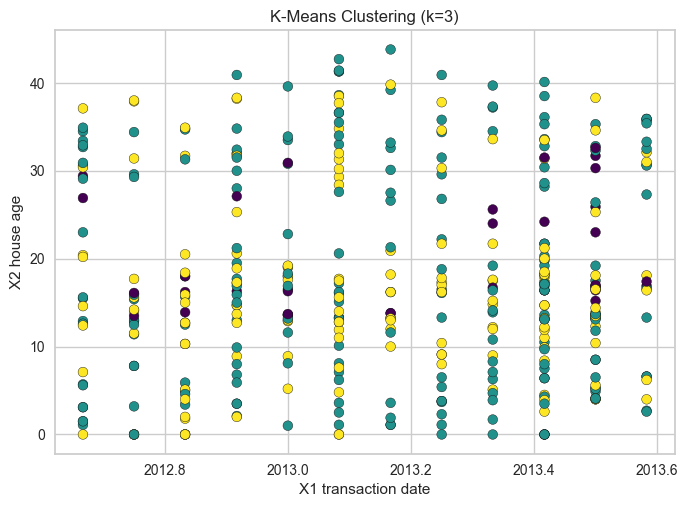

In [104]:
from sklearn.cluster import KMeans

# Extract features (X1 to X6)
features = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
                'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Choose the number of clusters (k)
k = 3  # You can adjust the number of clusters based on your understanding of the data

# Apply k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(features_standardized)

# Visualize the clusters
plt.scatter(df['X1 transaction date'], df['X2 house age'], c=df['cluster'], cmap='viridis', edgecolors='k')
plt.xlabel('X1 transaction date')
plt.ylabel('X2 house age')
plt.title(f'K-Means Clustering (k={k})')
plt.show()

In [129]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Price Category,cluster
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,20-40,1
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,40-60,1
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,40-60,1
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,40-60,1
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,40-60,1
...,...,...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,0-20,0
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,40-60,1
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,40-60,1
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,40-60,1


In [127]:
from pycaret.classification import *
clf = setup(data=df, target='Y house price of unit area', train_size=0.7, session_id=123)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [141]:
from pycaret.classification import *

data = pd.read_csv('fetal_health.csv')

# Set up the PyCaret environment
exp = setup(data, target='fetal_health', train_size=0.7, session_id=123)

In [142]:
#show the best model and their statistics
best_model = compare_models()

# Get you the results in a pandas dataframe (results object)
results = pull()

# Print out the results
print(results)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,02:04:09
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

                                    Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.9516  0.9897  0.9516  0.9518   
gbc          Gradient Boosting Classifier    0.9476  0.9835  0.9476  0.9487   
rf               Random Forest Classifier    0.9314  0.9865  0.9314  0.9316   
et                 Extra Trees Classifier    0.9254  0.9841  0.9254  0.9237   
dt               Decision Tree Classifier    0.9147  0.8901  0.9147  0.9168   
lr                    Logistic Regression    0.8851  0.9277  0.8851  0.8788   
lda          Linear Discriminant Analysis    0.8837  0.9567  0.8837  0.8831   
knn                K Neighbors Classifier    0.8797  0.9087  0.8797  0.8734   
ada                  Ada Boost Classifier    0.8669  0.8297  0.8669  0.8747   
ridge                    Ridge Classifier    0.8474  0.0000  0.8474  0.8363   
svm                   SVM - Linear Kernel    0.8454  0.0000  0.8454  0.8547   
nb                            Naive Bayes    0.8118 

In [143]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [133]:
clf_pca = setup(data=data, target='fetal_health', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [134]:
best_model_pca = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:53:08
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/61 [00:00<?, ?it/s]